# Emotional Analysis
## EmoBank Dataset labelled with Ekman model SkyWater21_rubert-base-cased-ru-go-emotions-ekman - Antonio Pagnotta

In [163]:
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
data = pd.read_csv('ekman_predictions_SkyWater21_rubert-base-cased-ru-go-emotions-ekman.csv')

In [165]:
data.head()

,V,A,D,text,predicted_emotion
0,3.00,3.00,3.20,"Remember what she said in my last letter? """,surprise
1,2.80,3.10,2.80,If I wasn't working here.,neutral
2,3.00,3.00,3.00,"..""",neutral
3,3.44,3.00,3.22,Goodwill helps people get off of public assist...,neutral
4,3.55,3.27,3.46,Sherry learned through our Future Works class ...,joy


In [166]:
print("Dataset shape: ")
print(data.shape)

Dataset shape: 
(10062, 5)


Rimuoviamo la colonna 'text', non è rilevante per l'analisi (poiché le frasi sono già state classificate).

In [167]:
no_text_data = data[['V', 'A', 'D', 'predicted_emotion']]
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,surprise
1,2.80,3.10,2.80,neutral
2,3.00,3.00,3.00,neutral
3,3.44,3.00,3.22,neutral
4,3.55,3.27,3.46,joy


Controlliamo i possibili valori di predicted_emotion

In [168]:
print("Predicted Emotions = ", no_text_data['predicted_emotion'].unique(), "\n")

Predicted Emotions =  ['surprise' 'neutral' 'joy' 'anger' 'sadness' 'fear' 'disgust'] 


Calcoliamo le statistiche descrittive per ogni emozione

In [169]:
for emotion in no_text_data['predicted_emotion'].unique():
    subset = no_text_data[no_text_data['predicted_emotion'] == emotion]
    print(f"Statistiche per '{emotion}':")
    print(subset[['V', 'A', 'D']].describe())

Statistiche per 'surprise':
                V           A           D
count  355.000000  355.000000  355.000000
mean     2.892648    3.089042    3.020873
std      0.251037    0.211994    0.197214
min      1.820000    2.550000    2.380000
25%      2.800000    2.900000    2.900000
50%      3.000000    3.100000    3.000000
75%      3.000000    3.200000    3.135000
max      3.800000    3.800000    3.750000
Statistiche per 'neutral':
                 V            A            D
count  7185.000000  7185.000000  7185.000000
mean      2.950607     3.018039     3.050071
std       0.322718     0.251803     0.203232
min       1.400000     1.800000     1.780000
25%       2.800000     2.880000     3.000000
50%       3.000000     3.000000     3.000000
75%       3.100000     3.140000     3.180000
max       4.330000     4.400000     4.100000
Statistiche per 'joy':
                 V            A            D
count  2173.000000  2173.000000  2173.000000
mean      3.106277     3.101289     3.108882
std 

Contiamo quanti valori ci sono per ogni tipo di emozione

In [170]:
print(no_text_data['predicted_emotion'].value_counts())
print("\n")

predicted_emotion
neutral     7185
joy         2173
surprise     355
anger        315
sadness       32
fear           1
disgust        1
Name: count, dtype: int64



Controlliamo la distribuzione dei valori di Valence, Arousal e Dominance per ogni emozione

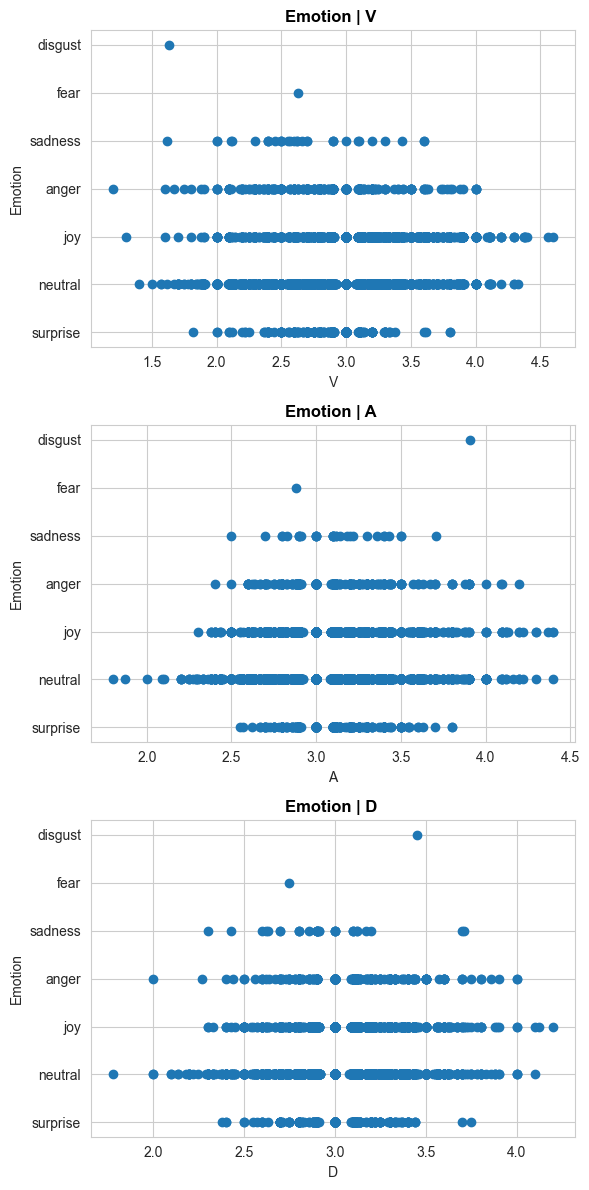

In [171]:
columns = ['V', 'A', 'D']
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for i, column in enumerate(columns):
    axs[i].plot(no_text_data[column], no_text_data['predicted_emotion'], 'o')
    axs[i].set_title(f'Emotion | {column} ', fontsize=12, fontweight='bold', color='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Emotion')
plt.tight_layout()
plt.show()

Varianza:                           V         A         D
predicted_emotion                              
anger              0.189022  0.085552  0.074686
disgust                 NaN       NaN       NaN
fear                    NaN       NaN       NaN
joy                0.151522  0.074773  0.045226
neutral            0.104147  0.063405  0.041303
sadness            0.217971  0.067431  0.084509
surprise           0.063020  0.044941  0.038893

Media:                           V         A         D
predicted_emotion                              
anger              2.809238  3.111143  3.094508
disgust            1.630000  3.910000  3.450000
fear               2.630000  2.880000  2.750000
joy                3.106277  3.101289  3.108882
neutral            2.950607  3.018039  3.050071
sadness            2.666875  3.103750  2.930625
surprise           2.892648  3.089042  3.020873


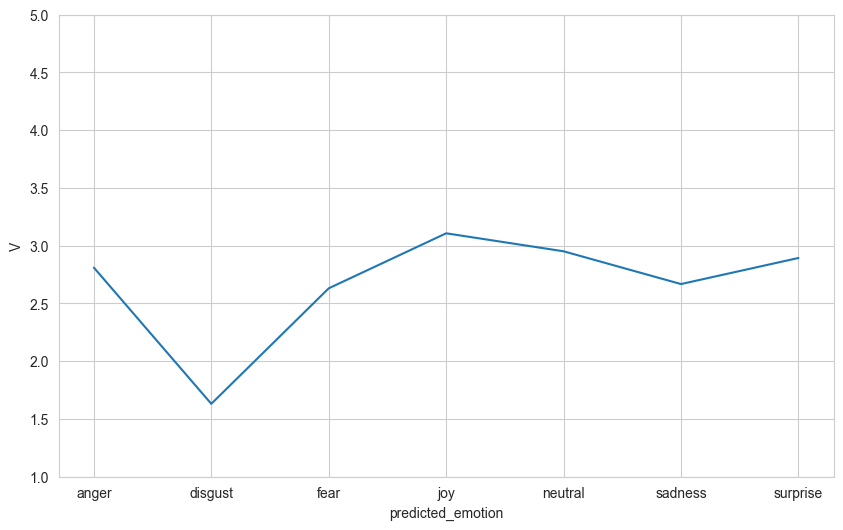

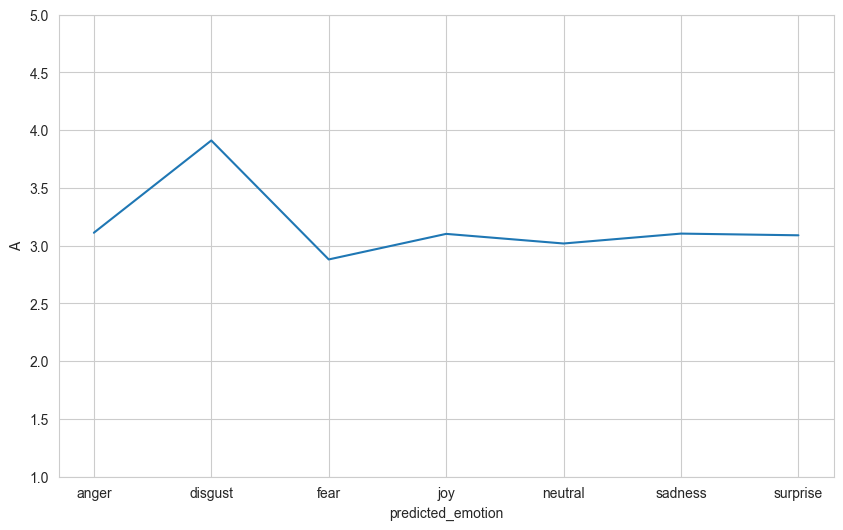

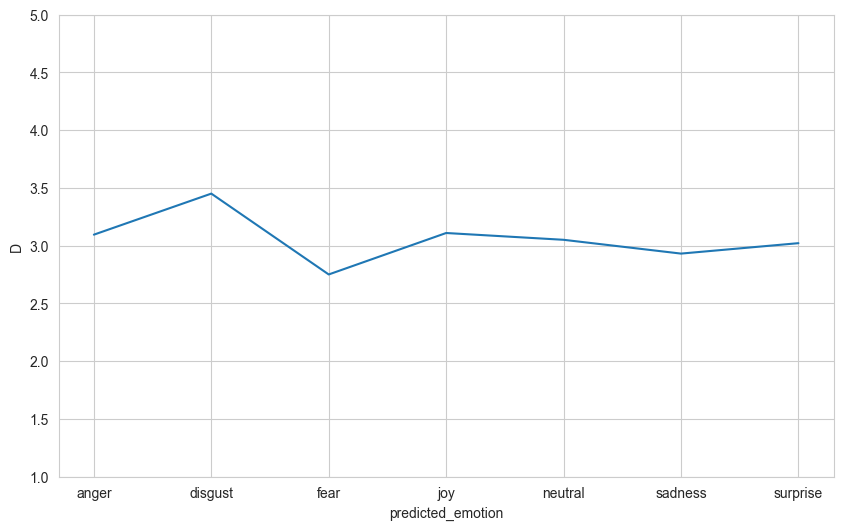

In [172]:
mean_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].mean()
variance_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].var()

print(f"Varianza: {variance_values_by_emotion}\n")
print(f"Media: {mean_values_by_emotion}")

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='V', ax=ax)
ax.set_ylim(1, 5)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='A', ax=ax)
ax.set_ylim(1, 5)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='D', ax=ax)
ax.set_ylim(1, 5)
plt.show()

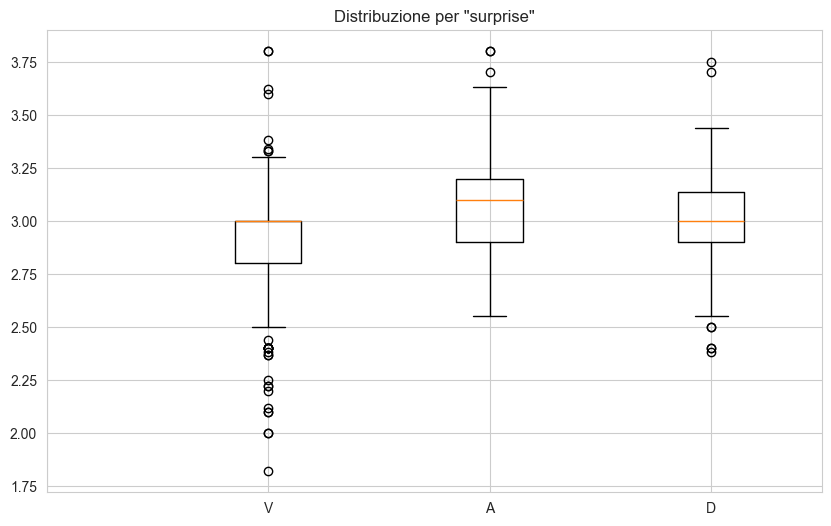

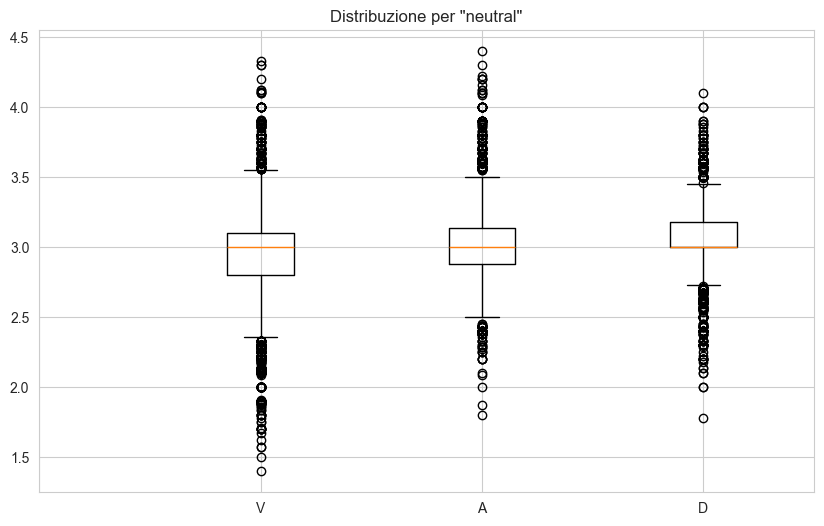

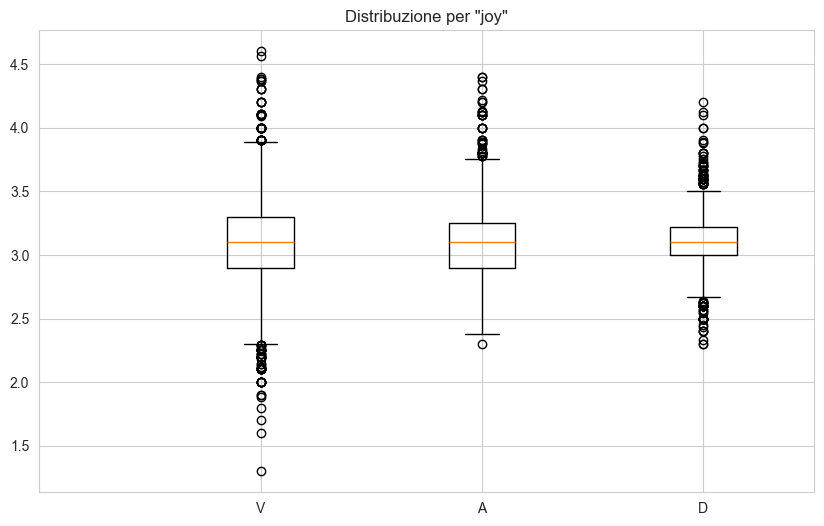

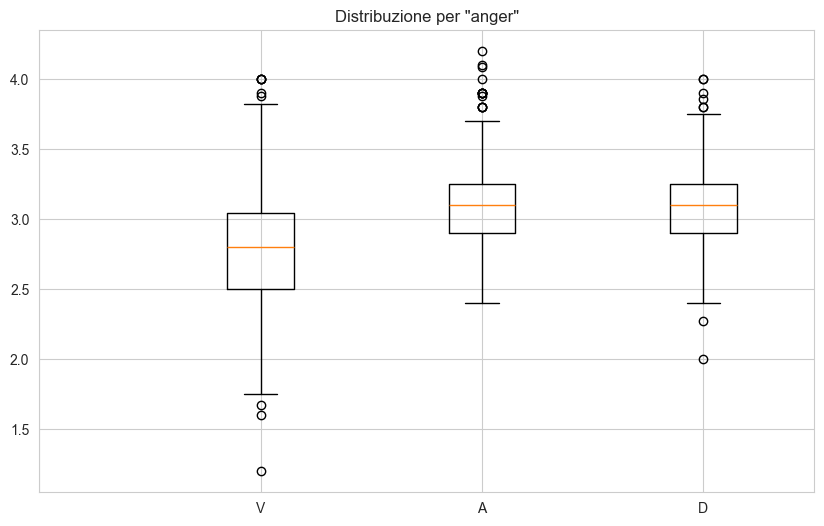

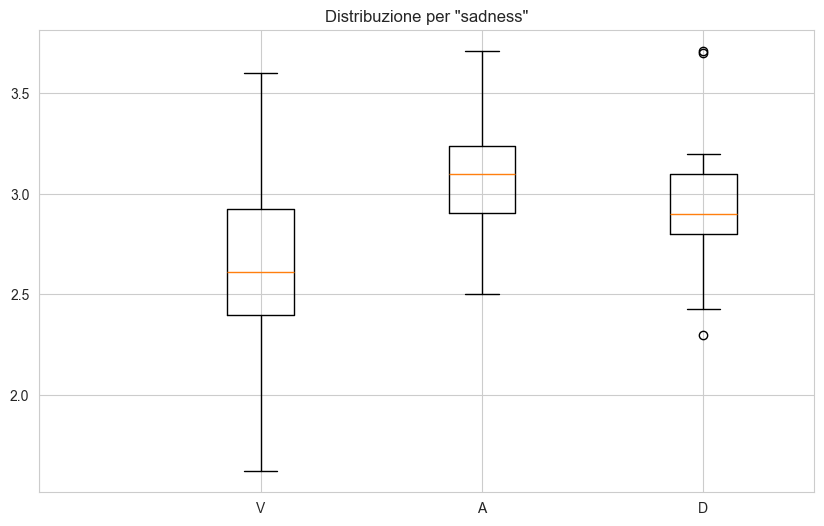

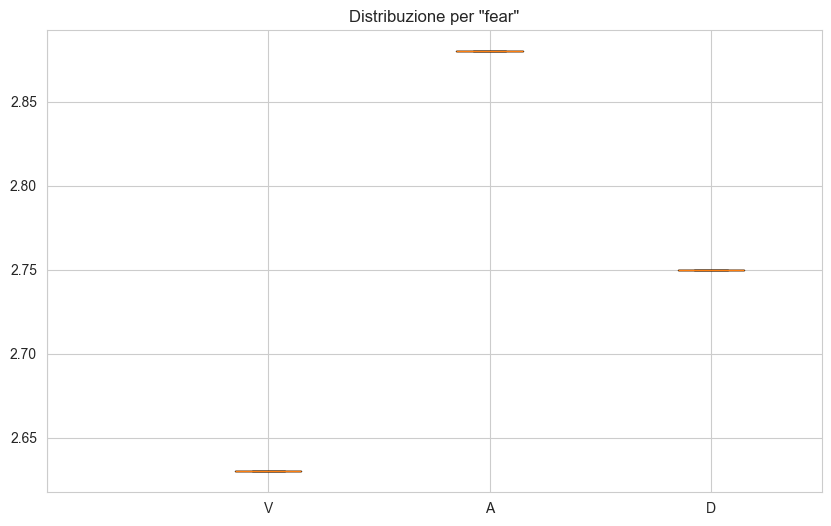

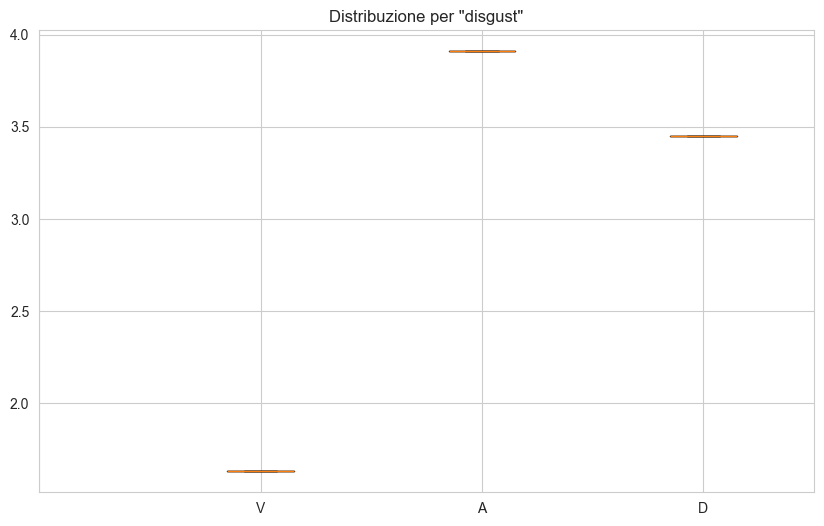

In [173]:
emotions = no_text_data['predicted_emotion'].unique()

for emot in emotions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribuzione per "{emot}"')
    plt.boxplot([no_text_data[no_text_data['predicted_emotion'] == emot]['V'], no_text_data[no_text_data['predicted_emotion'] == emot]['A'], no_text_data[no_text_data['predicted_emotion'] == emot]['D']])
    plt.xticks([0, 1, 2, 3], [' ', 'V', 'A', 'D'])
    plt.show()

In [174]:
#encoding emozioni
no_text_data.replace({'predicted_emotion':{'anger':0,'disgust':1,'fear':2,'joy':3, 'sadness':4, 'surprise':5, 'neutral':6}},inplace=True)
no_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   V                  10062 non-null  float64
 1   A                  10062 non-null  float64
 2   D                  10062 non-null  float64
 3   predicted_emotion  10062 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 314.6 KB


/var/folders/vw/nm4pm2012rj1j5k7yc6x23bw0000gn/T/ipykernel_62746/1539711505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_text_data.replace({'predicted_emotion':{'anger':0,'disgust':1,'fear':2,'joy':3, 'sadness':4, 'surprise':5, 'neutral':6}},inplace=True)


In [175]:
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,5
1,2.80,3.10,2.80,6
2,3.00,3.00,3.00,6
3,3.44,3.00,3.22,6
4,3.55,3.27,3.46,3


<Axes: >

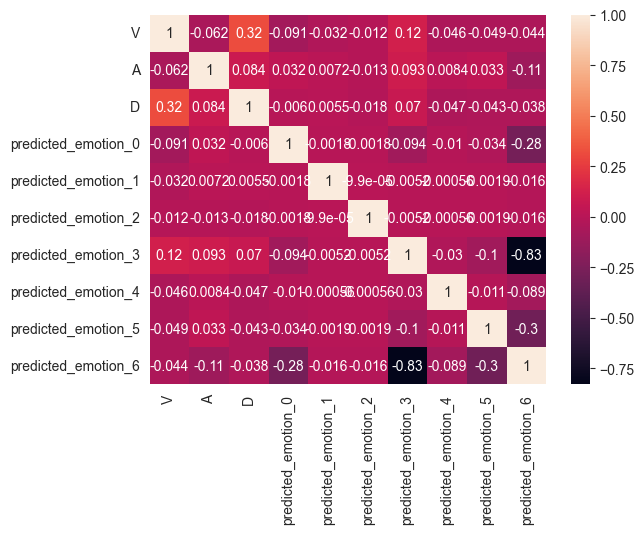

In [176]:
df_encoded = pd.get_dummies(no_text_data, columns=['predicted_emotion'])
for column in df_encoded.columns:
        df_encoded[column] = df_encoded[column].astype(int)
corr = df_encoded.corr()
sns.heatmap(corr, annot= True)

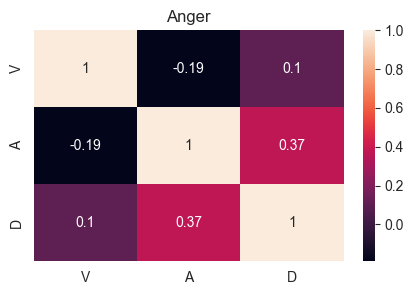

In [177]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 0]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Anger")
plot = sns.heatmap(corr_mat_joy, annot=True)

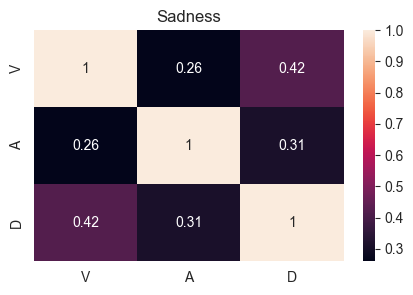

In [178]:
sadness = no_text_data.loc[no_text_data.predicted_emotion == 3]
sadness = sadness[['V', 'A', 'D']]
corr_mat_sadness = sadness.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Sadness")
plot = sns.heatmap(corr_mat_sadness, annot=True)

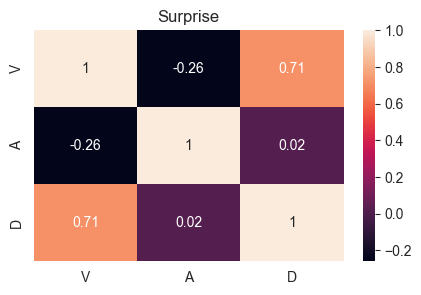

In [179]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 4]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Surprise")
plot = sns.heatmap(corr_mat_joy, annot=True)

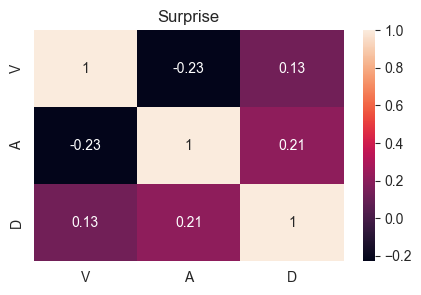

In [180]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 5]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Surprise")
plot = sns.heatmap(corr_mat_joy, annot=True)

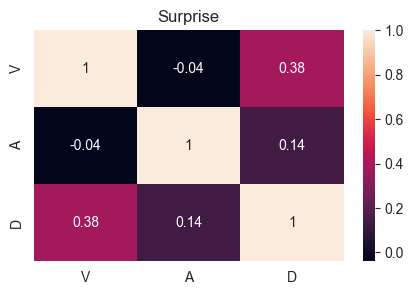

In [181]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 6]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Surprise")
plot = sns.heatmap(corr_mat_joy, annot=True)